In [1]:
!pip install qiskit qiskit_aer

In [2]:
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 2.4 MB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13/13 [qiskit-ibm-runtime]iskit-ibm-runtime]es]


In [3]:
# Grover's Search Algorithm using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # use mcx() in Qiskit 2.x
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

In [5]:
def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

Searching for marked state: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


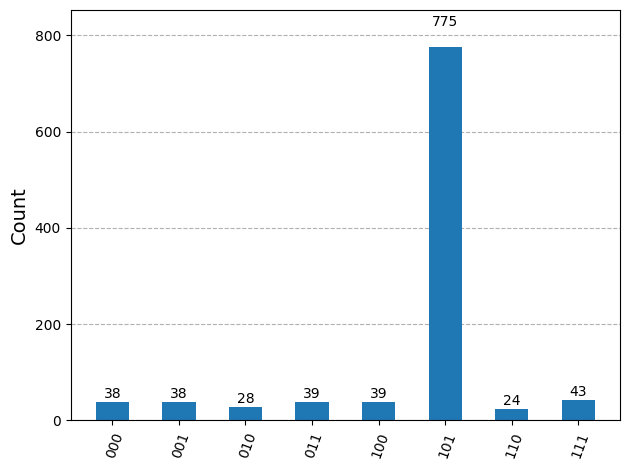

In [6]:
def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "101"
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

Searching for marked state: 001
     ┌───┐┌───┐     ┌───┐┌───┐┌───┐          ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤├───┤  │  ├───┤├───┤├───┤       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


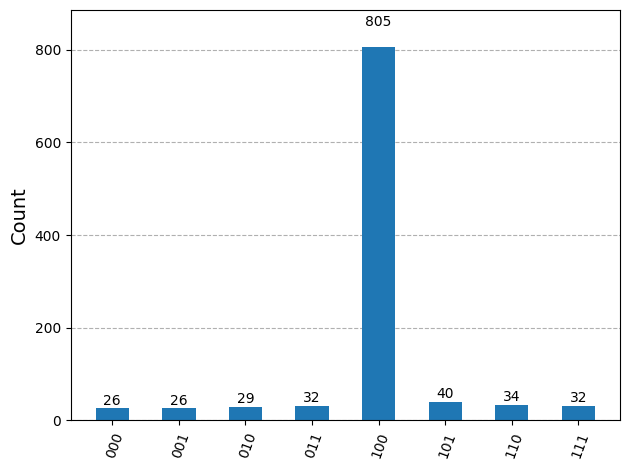

In [7]:
"""
Task 1 - Change the marked state
Try different marked states such as 001, 111, or 010 and observe the output histogram.
"""

if __name__ == "__main__":
    marked_state = "001"  

    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

In [8]:
"""
Task 2 - Modify the number of qubits
Extend the algorithm to 4 qubits and update the oracle and diffuser accordingly.
"""

def oracle_n_qubit(qc, n, marked_state):
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

def diffuser_n_qubit(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    
    qc.x(range(n))
    qc.h(range(n))

Building 4-qubit circuit to find '1010' with 3 iterations.


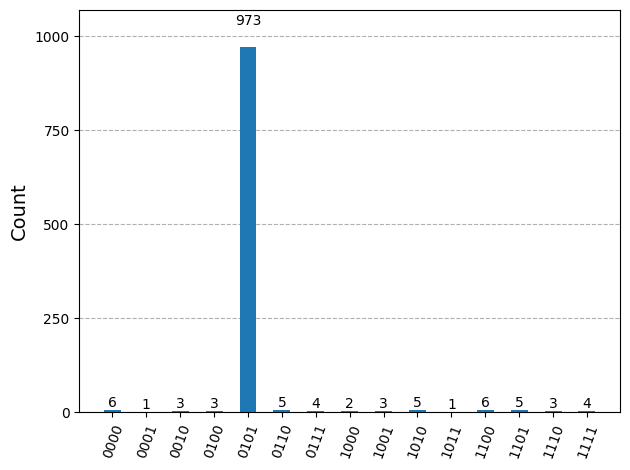

In [9]:
"""
Task 3 - Add multiple iterations
Run the oracle and diffuser steps multiple times to increase the probability of finding the marked state.
"""

def grover_search_n_qubit(n_qubits, marked_state, iterations):
    qc = QuantumCircuit(n_qubits, n_qubits)
    
    qc.h(range(n_qubits))
    for _ in range(iterations):
        qc.barrier()
        oracle_n_qubit(qc, n_qubits, marked_state)
        diffuser_n_qubit(qc, n_qubits)
    
    qc.barrier()
    qc.measure(range(n_qubits), range(n_qubits))
    return qc

# Tasks 2,3
if __name__ == "__main__":
    n = 4
    marked_state_4 = "1010"
    num_iterations = 3
    
    print(f"Building {n}-qubit circuit to find '{marked_state_4}' with {num_iterations} iterations.")
    
    qc_4_qubit = grover_search_n_qubit(n, marked_state_4, num_iterations)
    run_grover(qc_4_qubit)

In [10]:
"""
Task 4 - Circuit Visualization
Use qc.draw('mpl') to visualize the circuit structure in the notebook.
"""

n = 4
marked_state_4 = "1010"
num_iterations = 3
qc_4_qubit = grover_search_n_qubit(n, marked_state_4, num_iterations)

qc_4_qubit.draw('mpl', fold=-1)
plt.show()

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

Loading noise model from 'FakeManila' backend...
Running IDEAL simulation...
Running NOISY simulation...
Ideal Counts: {'1110': 7, '0101': 985, '1011': 3, '0010': 4, '1010': 3, '0001': 1, '1111': 1, '0000': 4, '0111': 5, '0110': 4, '1000': 3, '1001': 1, '0011': 1, '0100': 2}
Noisy Counts: {'1001': 30, '1010': 31, '1111': 27, '0101': 487, '1101': 30, '1100': 20, '0011': 39, '0111': 56, '0110': 22, '0100': 55, '0000': 44, '0010': 22, '1011': 24, '0001': 101, '1110': 15, '1000': 21}


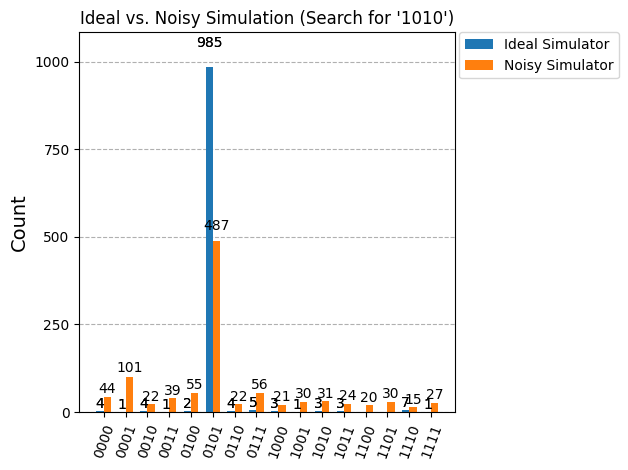

In [ ]:
"""
Task 5 - Experiment with Noise
Add a noise model using Qiskit Aer’s NoiseModel and compare results with the ideal simulator.
"""

n = 4
marked_state_4 = "1010"
num_iterations = 3
qc_4_qubit = grover_search_n_qubit(n, marked_state_4, num_iterations)

ideal_simulator = AerSimulator()

print("Loading noise model from 'FakeManila' backend...")
fake_backend = FakeManilaV2()
noise_model = NoiseModel.from_backend(fake_backend)

noisy_simulator = AerSimulator(noise_model=noise_model)

print("Running IDEAL simulation...")
ideal_result = ideal_simulator.run(transpile(qc_4_qubit, ideal_simulator), shots=1024).result()
ideal_counts = ideal_result.get_counts()

print("Running NOISY simulation...")
noisy_result = noisy_simulator.run(transpile(qc_4_qubit, noisy_simulator), shots=1024).result()
noisy_counts = noisy_result.get_counts()

print("Ideal Counts:", ideal_counts)
print("Noisy Counts:", noisy_counts)

plot_histogram(
    [ideal_counts, noisy_counts],
    legend=['Ideal Simulator', 'Noisy Simulator'],
    title="Ideal vs. Noisy Simulation (Search for '1010')"
)
plt.show()